**Prediction Using Unsupervised ML**

**Importing Libraries :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets 

**Loading the Dataset :**

In [2]:
iris_data = datasets.load_iris()

In [3]:
dataset = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
dataset.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [4]:
iris_data.target_names #Dependent Variables

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
x = dataset.iloc[:,:4].values #Independent Variable 
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Preapring the Data :**

In [6]:
k = list(range(2, 15))
TWSS= []# TWSS is useful for comparing Different Results

In [7]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    WSS = [] #WSS is used for measuring the Compactness
    for j in range(i):
        WSS.append(sum(cdist(x[kmeans.labels_ == j, :], kmeans.cluster_centers_[j].reshape(1, x.shape[1]), 'euclidean')))
    TWSS.append(sum(WSS))
TWSS

[array([128.33666543]),
 array([97.20457357]),
 array([83.60771591]),
 array([76.44782927]),
 array([70.06100945]),
 array([65.49395286]),
 array([62.35864614]),
 array([59.56594488]),
 array([57.83845749]),
 array([55.88336557]),
 array([53.62561287]),
 array([52.58006781]),
 array([50.86153769])]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

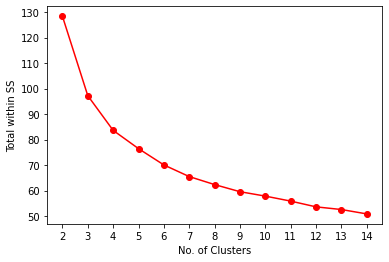

In [8]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No. of Clusters")
plt.ylabel("Total within SS"); plt.xticks(k)
model = KMeans(n_clusters = 3)
model.fit(x)
model.labels_

In [9]:
print(model.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


**KMeans Clustering Algorithm :**

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
pred = kmeans.fit_predict(x)

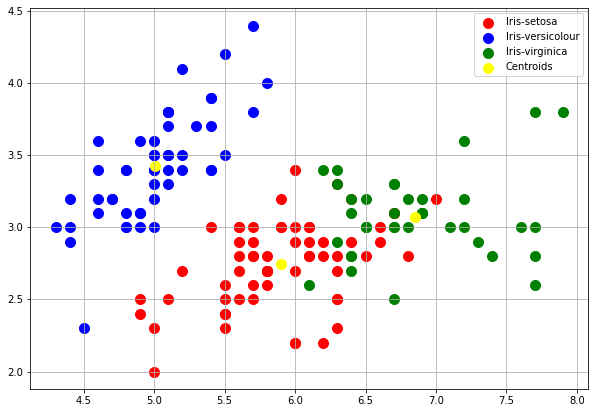

In [11]:
plt.figure(figsize=(10,7))

# Visualising the clusters - On the first two columns
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')


plt.legend()
plt.grid()
plt.show()